# Linear Algebra

## matrix creation and operation

In [1]:
# matrices
import numpy as np
A = np.array([[1,  4,  5, 12],
              [-5, 8,  9,  0],
              [-6, 7, 11, 19]])

In [2]:
# row access
A[0], A[-1]

(array([ 1,  4,  5, 12]), array([-6,  7, 11, 19]))

In [3]:
# column access
A[:,0], A[:,-1]

(array([ 1, -5, -6]), array([12,  0, 19]))

In [75]:
# matrix can also be made by stacking 1-D arrays
v1 = np.array([0, 1, 2])
v2 = np.array([3, 4, 5])
v3 = np.array([6, 7, 8])
v4 = np.array([3, 3, 3])

In [88]:
# 2-d arrays
v11 = np.array([[0, 1, 2]])
v22 = np.array([[3, 4, 5]])
v33 = np.array([[6, 7, 8]])
v44 = np.array([[3, 3, 3]])

In [80]:
np.vstack([v1, v2, v3]), np.vstack([v11, v22, v33])

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]),
 array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]))

In [81]:
np.hstack([v1, v2, v3]), np.hstack([v11, v22, v33])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([[0, 1, 2, 3, 4, 5, 6, 7, 8]]))

- concatenate arrays
  - very useful for quickly constructing arrays in a concise and readable manner.
  - np.r_[ ]: Concatenates arrays along the row axis (axis 0).
  - np.c_[ ]: Concatenates arrays along the column axis (axis 1).

In [82]:
# 1-d arrays
np.r_[v1, v2, v3], np.r_[v11, v22, v33]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]))

In [83]:
np.c_[v1, v2, v3], np.c_[v11.T, v22.T, v33.T]

(array([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]]),
 array([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]]))

- matrix multiplication

In [84]:
M = np.vstack([v1, v2, v3]); M

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [90]:
v4, v44, v4.shape, v44.shape

(array([3, 3, 3]), array([[3, 3, 3]]), (3,), (1, 3))

In [87]:
M.dot(v4) , np.dot(M, v4), M@v4     # dot multiplication

(array([ 9, 36, 63]), array([ 9, 36, 63]), array([ 9, 36, 63]))

In [92]:
try:
    M.dot(v44)
except:
    print('Error')


Error


In [95]:
v4.T, v44.T, v4 == v4.T

(array([3, 3, 3]),
 array([[3],
        [3],
        [3]]),
 array([ True,  True,  True]))

In [96]:
M.dot(v4.T), v4.T.dot(M), v4.dot(M)

(array([ 9, 36, 63]), array([27, 36, 45]), array([27, 36, 45]))

In [97]:
np.dot(M,v4),  np.dot(M,v4.T), np.dot(v4,M), np.dot(v4.T,M)    # equivalent to the above

(array([ 9, 36, 63]),
 array([ 9, 36, 63]),
 array([27, 36, 45]),
 array([27, 36, 45]))

In [98]:
v4, v4.shape, v4.T.shape

(array([3, 3, 3]), (3,), (3,))

In [100]:
np.multiply(M,[1,2,3]), np.multiply(v4,v4)   # element-wise multiplication (and broadcasting)

(array([[ 0,  2,  6],
        [ 3,  8, 15],
        [ 6, 14, 24]]),
 array([9, 9, 9]))

In [101]:
np.multiply(M,[[1],[2],[3]])

array([[ 0,  1,  2],
       [ 6,  8, 10],
       [18, 21, 24]])

In [102]:
np.linalg.det(M)     # determinant

0.0

In [109]:
M =np.array([[1, -1, 0],
             [2, 0, -1],
             [1, 2, -1]])

In [111]:
M_inv = np.linalg.inv(M); M_inv

array([[-2.,  1., -1.],
       [-3.,  1., -1.],
       [-4.,  1., -2.]])

In [112]:
M_inv.dot(M), M.dot(M_inv)

(array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))

In [113]:
M = np.array([[1,0],
              [0,1]])
M

array([[1, 0],
       [0, 1]])

In [114]:
np.linalg.inv(M), np.linalg.pinv(M)  # pseudo inverse (generalized inverse using its SVD)
                                     # useful when the matrix is singular (non-invertible)

(array([[1., 0.],
        [0., 1.]]),
 array([[1., 0.],
        [0., 1.]]))

- pseudo-inverse of A (A+)
  - either A\*A+ or A+\*A is close to I depending on the shape of the matrix

In [124]:
A = np.array([[1, 0],
              [2,-1],
              [1, 1]])
try:
    np.linalg.inv(A)
except:
    print("Error: singular matrix. Trying pinv() instead")
    A_pinv = np.linalg.pinv(A)
    print (A_pinv)

Error: singular matrix. Trying pinv() instead
[[ 0.18181818  0.27272727  0.27272727]
 [ 0.09090909 -0.36363636  0.63636364]]


In [125]:
np.dot (A, A_pinv), np.dot (A_pinv, A)  # these are not the same
                                        # if A is a tall matrix,
                                        # A_pinv*A is close to the Identity matrix.

(array([[ 0.18181818,  0.27272727,  0.27272727],
        [ 0.27272727,  0.90909091, -0.09090909],
        [ 0.27272727, -0.09090909,  0.90909091]]),
 array([[ 1.00000000e+00,  5.55111512e-17],
        [-1.11022302e-16,  1.00000000e+00]]))

In [126]:
B = [[1,2,3],
     [1,5,7]]
np.dot (B, np.linalg.pinv(B))      # if A is a wide matrix,
                                   # A*A_pinv is close to the Identity matrix.

array([[ 1.00000000e+00, -5.13478149e-16],
       [-3.05311332e-16,  1.00000000e+00]])

## Eigen values, eigen vectors

In [127]:
## A.v = lambda.v
A = np.array([[ 0., 1.],
              [-2.,-3.]])
eigvals, eigvecs = np.linalg.eig(A)
print(eigvals, "\n",  eigvecs)

[-1. -2.] 
 [[ 0.70710678 -0.4472136 ]
 [-0.70710678  0.89442719]]


In [128]:
eigvals[0]*eigvecs[:,0], A.dot(eigvecs[:,0])  # A * v = lambda * v

(array([-0.70710678,  0.70710678]), array([-0.70710678,  0.70710678]))

In [129]:
eigvals[1]*eigvecs[:,1], A.dot(eigvecs[:,1])

(array([ 0.89442719, -1.78885438]), array([ 0.89442719, -1.78885438]))

## LU decomposition

- A is nxn matrix or mxn matrix
- A = LU or PLU (more compuataionally stable)
- L is the lower triangle matrix and U is the upper triangle matrix

In [130]:
import numpy as np
from scipy.linalg import lu, lu_factor

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
# LU decomposition
# PLU decomposition: The rows of the parent matrix are re-ordered to simplify the
# decomposition process and the additional P matrix specifies a way to permute the
# result or return the result to the original order
P, L, U = lu(A)         # LU with partial pivoting (PLU decomposition)
print(P, "\n")
print(L.round(2), "\n")
print(U.round(2), "\n")

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]] 

[[1.   0.   0.  ]
 [0.14 1.   0.  ]
 [0.57 0.5  1.  ]] 

[[7.   8.   9.  ]
 [0.   0.86 1.71]
 [0.   0.   0.  ]] 



In [131]:
# reconstruct
B = P.dot(L).dot(U)
print(B)
L.dot(U)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


array([[7., 8., 9.],
       [1., 2., 3.],
       [4., 5., 6.]])

In [132]:
P_inv = np.linalg.inv(P)

In [26]:
P_inv.dot(A)   # A = P.L.U  --> P_inv.A = L.U

array([[7., 8., 9.],
       [1., 2., 3.],
       [4., 5., 6.]])

In [133]:
# mxn matrix
A = np.array([[1,  3,  2, 0],
              [3, 10,  5, 1],
              [0, -1,  2, 1]])
P, L, U = lu(A)
print(P, "\n")
print(L.round(2), "\n")
print(U.round(2), "\n")

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]] 

[[1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.33 0.33 1.  ]] 

[[ 3.   10.    5.    1.  ]
 [ 0.   -1.    2.    1.  ]
 [ 0.    0.   -0.33 -0.67]] 



In [134]:
 P.dot(L).dot(U)

array([[ 1.,  3.,  2.,  0.],
       [ 3., 10.,  5.,  1.],
       [ 0., -1.,  2.,  1.]])

## QR decomposition
- Factor the matrix a as qr, where q is orthogonal (orthonormal columns) and r is upper-triangular.
- A; any mxn matrix
- A = QR
- Q is an m x m orthoginal matrix, and R is an upper triangle matrix with the size m x n
- modes:
  - reduced mode: suitable for compact representation and reconstruction of A (Q: orthogonal columns)
  - complete mode: provides a full orthonormal basis for the space spanned by the rows of A (Q: full orthogonal basis)

In [149]:
# QR decomposition

from numpy.linalg import qr

A = array([[1, 2],
           [3, 4],
           [5, 6]])  # 3 x 2 matrix

# QR decomposition
Q, R = qr(A)           # default mode = "reduced"
print(Q.round(2), "\n")
print(R.round(2))

[[-0.17  0.9 ]
 [-0.51  0.28]
 [-0.85 -0.35]] 

[[-5.92 -7.44]
 [ 0.    0.83]]


In [150]:
Q@R

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

In [154]:
Q_complete, R_complete = qr(A, mode='complete')       # complete’ : returns q, r with dimensions (M, M), (M, N)
print(Q_complete.round(2), "\n")
print(R_complete.round(2))

[[-0.17  0.9   0.41]
 [-0.51  0.28 -0.82]
 [-0.85 -0.35  0.41]] 

[[-5.92 -7.44]
 [ 0.    0.83]
 [ 0.    0.  ]]


In [155]:
# reconstruct
Q_complete.dot(R_complete)

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

In [156]:
# check orthonormality (orthogonal + normal)
for i in range(3):
    print(np.sqrt ((Q_complete[:,i]**2).sum()))

for i in range(3):
    for j in range(i+1, 3):
        print((Q_complete[:,i] * Q_complete[:,j]).sum())

1.0
1.0
1.0
5.551115123125783e-17
1.6653345369377348e-16
0.0


In [161]:
# check orthogonal matrix (Q@Q.T = Q.T@Q = I)
Q_complete.T @ Q_complete

array([[1.00000000e+00, 6.18439648e-17, 1.45536841e-16],
       [6.18439648e-17, 1.00000000e+00, 1.27605396e-17],
       [1.45536841e-16, 1.27605396e-17, 1.00000000e+00]])

In [162]:
np.allclose(Q_complete.T, np.linalg.inv(Q_complete)) # Q.T = Q_{-1}

True

## Eigen-decomposition
- A = P.D.P^{-1}
- all n x n matrices
- if A is symmetric -> eigenvectors are orthogonal -> A = P.D.P^{-1} = P.D.P^T

In [163]:
# non-symmetric matrix
A = [[1,2],
     [3,4]]
eigvals, eigvecs = np.linalg.eig(A)
print(eigvals)
print(eigvecs)

[-0.37228132  5.37228132]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


In [164]:
np.dot(eigvecs[:,0],eigvecs[:,1])  # not orthogonal (A_inv != A.T)

-0.17149858514250893

In [165]:
P = eigvecs
print(P.dot(np.diag(eigvals)).dot(np.linalg.inv(P)))   # A =  P.D.P^{-1}
print(P.dot(np.diag(eigvals)).dot(P.T))                # A != P.D.P^T

[[1. 2.]
 [3. 4.]]
[[0.67647059 2.20588235]
 [2.20588235 4.32352941]]


In [166]:
# symmetric matrix
A = np.array([[6,2],
              [2,3]])
eigvals, eigvecs = np.linalg.eig(A)  # v1=eigvecs[:,0], v2=eigvecs[:,1]
print(eigvals)
print(eigvecs)

[7. 2.]
[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


In [167]:
np.dot(eigvecs[:,0],eigvecs[:,1])  # eigenvectors are orthogonal

0.0

In [168]:
# reconstruct
P = eigvecs
D = np.diag(eigvals)
print(P.dot(D).dot(np.linalg.inv(P)))   # A =  P.D.P^{-1}
print(P.dot(D).dot(P.T))                # A = P.D.P^T

[[6. 2.]
 [2. 3.]]
[[6. 2.]
 [2. 3.]]


- So far, we know
  - A is not symmstric, A = P.D.P^{-1}
  - A is symmetric, eigenvectors are orthogonal (P^{-1}=P^T), A = P.D.P^{-1} = P.D.P^T

In [169]:
# one more example
A = np.array([[1,0],
              [6,-1]])
eigvals, eigvecs = np.linalg.eig(A)  # v1=eigvecs[:,0], v2=eigvecs[:1]
print(eigvals, "\n",eigvecs)

[-1.  1.] 
 [[0.         0.31622777]
 [1.         0.9486833 ]]


In [41]:
# reconstruct
P, D = eigvecs, np.diag(eigvals)
(P).dot(D).dot(np.linalg.inv(P))

array([[ 1.,  0.],
       [ 6., -1.]])

## SVD (singular value decomposition)
- A = U.S.VT
- U,V are orthogonal matrices (UT=U−1 and VT=V−1)
- S is a diagonal matrix (all 0 except the diagonal).
- However S is not necessarily square.
- The columns of U are called the left-singular vectors of A, while the columns of V are the right-singular vectors of A.
- The values along the diagonal of S are the singular values of A.

In [170]:
A = array([[1, 2],
           [3, 4],
           [5, 6]])  # 3 x 2 matrix
U, S, VT = np.linalg.svd(A)
Smat = np.diag(S)
Smat = np.vstack([Smat,[0,0]])
print(U,"\n\n", Smat, "\n\n" ,VT)

[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]] 

 [[9.52551809 0.        ]
 [0.         0.51430058]
 [0.         0.        ]] 

 [[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


In [171]:
print(S)   # singular values
print(np.diag(S))

[9.52551809 0.51430058]
[[9.52551809 0.        ]
 [0.         0.51430058]]


In [172]:
# reconstruct
U.dot(Smat).dot(VT)

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

In [173]:
# check orthonormality
print(U.shape, VT.shape)

for i in range(U.shape[0]):
    print(np.sqrt ((U[:,i]**2).sum()))

for i in range(U.shape[0]):
    for j in range(i+1, 3):
        print((U[:,i] * U[:,j]).sum())

V = VT.T
for i in range(V.shape[0]):
    print(np.sqrt ((V[:,i]**2).sum()))

for i in range(V.shape[0]):
    for j in range(i+1, 2):
        print((V[:,i] * V[:,j]).sum())

(3, 3) (2, 2)
1.0
1.0
1.0
5.551115123125783e-17
5.551115123125783e-17
0.0
0.9999999999999999
0.9999999999999999
0.0


# A sample for SVD and PCA
- from https://stackoverflow.com/questions/61386915/different-results-with-pca-and-svd-on-data-with-same-units

In [175]:
import numpy as np
from scipy.linalg import svd   # more control over the SVD process than linalg.svd
from sklearn.preprocessing import StandardScaler

X = np.array([[13.71, 1.86, 2.36, 16.6],
              [12.22, 1.29, 1.94, 19.],
              [13.27, 4.28, 2.26, 20.],
              [13.16, 3.57, 2.15, 21.],
              [13.86, 1.51, 2.67, 25.]])
sc = StandardScaler()
X_std = sc.fit_transform(X)

- X_T.X = V(S_T.S)V_T
- Cov = 1/(n-1)*X_T.X (covariance matrix)
- So, square of singular values of X = (n-1) * eigenvalues of Cov

- covariance matrix

In [192]:
# the matrix with raw data
print(np.cov(X, rowvar=False).round(2))  # rows are observations, columns are features

Xs = X - X.mean(axis=0)                 # centered
np.round(Xs.T.dot(Xs)/(len(Xs)-1), 2)   # the same as the above (covariance matrix)

[[ 0.41  0.07  0.16  0.61]
 [ 0.07  1.79 -0.05 -0.12]
 [ 0.16 -0.05  0.07  0.47]
 [ 0.61 -0.12  0.47  9.51]]


array([[ 0.41,  0.07,  0.16,  0.61],
       [ 0.07,  1.79, -0.05, -0.12],
       [ 0.16, -0.05,  0.07,  0.47],
       [ 0.61, -0.12,  0.47,  9.51]])

In [190]:
# the matrix with standard scaled data (already centered)
np.cov(X_std, rowvar=False).round(2), \
np.round(np.dot(X_std.T, X_std)/(len(X_std) - 1), 2)  # the same as the above

(array([[ 1.25,  0.1 ,  1.15,  0.38],
        [ 0.1 ,  1.25, -0.17, -0.04],
        [ 1.15, -0.17,  1.25,  0.71],
        [ 0.38, -0.04,  0.71,  1.25]]),
 array([[ 1.25,  0.1 ,  1.15,  0.38],
        [ 0.1 ,  1.25, -0.17, -0.04],
        [ 1.15, -0.17,  1.25,  0.71],
        [ 0.38, -0.04,  0.71,  1.25]]))

- The eigenvalues of XT*X are the squares of the singular values of X, i.e.
  - XT.X = (USVT)^T . (USVT) = V(ST.S)VT
- Xc = np.dot(X.T,X)/(n-1)  # covariance
- eigen_value(Xc) * (n-1) = singular_value(X)**2

In [194]:
# PCA (X should be centered around zero -> X_std)

cov_mat = np.cov(X_std.T)                           # 1/(n-1)*dot(XT,X) is a covariance matrix
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)    # eigh is faster, but only for symmetrics matrix

# SVD
U, singular_vals, VT = svd(X_std)

print('Eig of Cov * (n-1):\t {}'.format(eigen_vals[::-1]*(5-1)))   # from cov of X
print('Singular value **2: \t {}'.format(singular_vals**2))         # from SVD

Eig of Cov * (n-1):	 [11.1732417   5.13574315  3.61254937  0.07846578]
Singular value **2: 	 [11.1732417   5.13574315  3.61254937  0.07846578]


## Coordinate Format and CSC(compressed sparse column)

In [195]:
# create using (data, ij) tuple:
from scipy import sparse

row = np.array([1,3,2,0,3,1])
col = np.array([0,0,1,2,2,3])
data = np.array([2,4,1,3,1,1])
mtx = sparse.csc_matrix((data, (row, col)), shape=(4, 4))
print(mtx)
print(mtx.todense())
print(mtx.data, mtx.indices, mtx.indptr)

  (1, 0)	2
  (3, 0)	4
  (2, 1)	1
  (0, 2)	3
  (3, 2)	1
  (1, 3)	1
[[0 0 3 0]
 [2 0 0 1]
 [0 1 0 0]
 [4 0 1 0]]
[2 4 1 3 1 1] [1 3 2 0 3 1] [0 2 3 5 6]


In [196]:
# create using (data, indices, indptr) tuple:
# row indices for column i are stored in indices[indptr[i]:indptr[i+1]]

data = np.array([2,4,1,3,1,1])
indices = np.array([1,3,2,0,3,1])
indptr = np.array([0, 2, 3, 5, 6])   # 2개, 1개, 2개, 1개
mtx = sparse.csc_matrix((data, indices, indptr), shape=(4, 4))
mtx.todense()

matrix([[0, 0, 3, 0],
        [2, 0, 0, 1],
        [0, 1, 0, 0],
        [4, 0, 1, 0]])

## image reconstruction using SVD
- from https://cmdlinetips.com/2020/01/image-reconstruction-using-singular-value-decomposition-svd-in-python/

In [197]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
import seaborn as sns

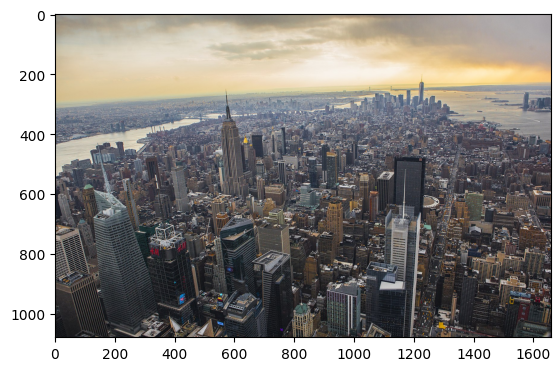

In [199]:
# ny_file = "1092px-5_Boroughs_Labels_New_York_City_Map.svg.png"
ny_file = "640px-Above_Gotham.jpg"
img = Image.open(ny_file)

plt.imshow(img)

In [200]:
img.size   # (width, height)

(1659, 1080)

In [201]:
# extract red component of the image
red_band =img.getdata(band=0)   # return flattened
# convert to numpy array
img_arr = np.array(list(red_band), float)
img_arr.shape

(1791720,)

(1080, 1659)


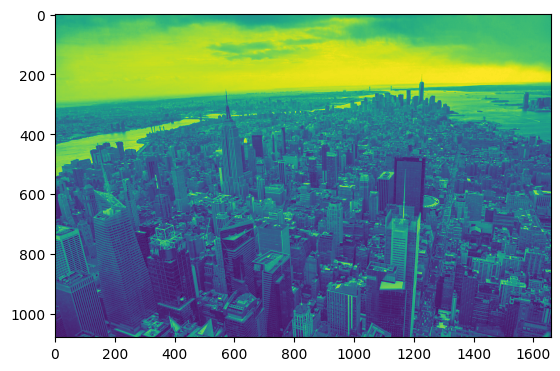

In [202]:
img_arr = img_arr.reshape(img.size[1], img.size[0])  # (height, width)
print(img_arr.shape)
plt.imshow(img_arr)

- just for your reference (in case you want to convert it into greyscale)

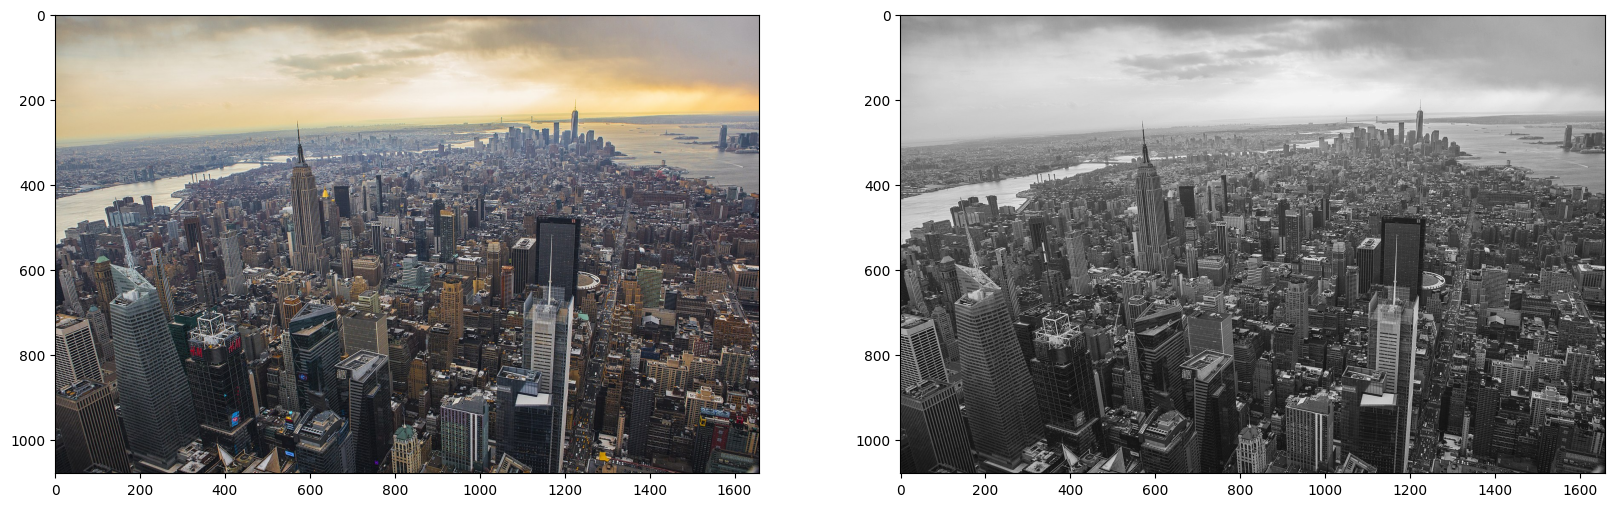

In [203]:
# or, convert it into greyscale
import matplotlib.image as mpimg
from PIL import Image

ny_file2 = "640px-Above_Gotham.jpg"

# - direct calculation-
# def rgb2gray(rgb):
#     return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
#
# img = mpimg.imread(ny_file2)
# gray = rgb2gray(img)

# - or, use PIL.Image -
gray = Image.open(ny_file2).convert('L')

fig, axs = plt.subplots(1, 2, figsize=(20,20))
axs[0].imshow(img)
axs[1].imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()

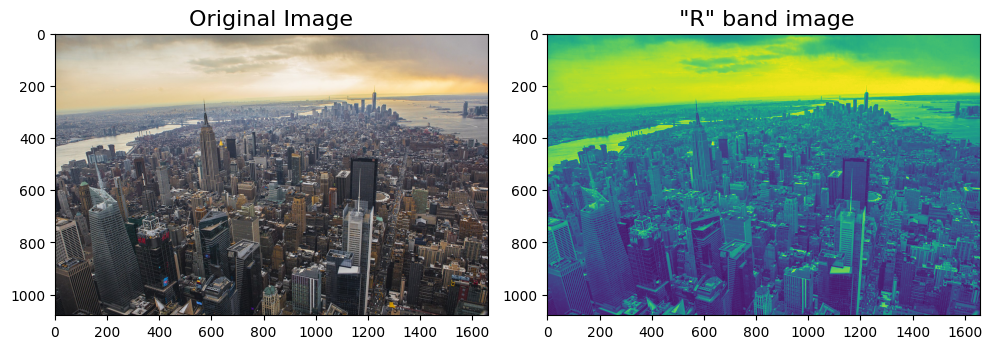

In [204]:
fig, axs = plt.subplots(1, 2,figsize=(10,10))
axs[0].imshow(img)
axs[0].set_title('Original Image', size=16)
axs[1].imshow(img_arr)
axs[1].set_title(' "R" band image', size=16)
plt.tight_layout()
plt.savefig('Original_image_and_R_band_image_for_SVD.jpg',dpi=150)

In [205]:
# Let us center and scale the data before applying SVD. This will help us put
# each variable in the same scale.
# scale the image matrix before SVD
img_arr_scaled=  (img_arr-img_arr.mean())/img_arr.std()

In [208]:
# Perform SVD using np.linalg.svd
U, S, VT = np.linalg.svd(img_arr_scaled)

In [216]:
img_arr_scaled.shape, U.shape, S.shape, VT.shape    # m*n = m*m, m*n, n*n

((1080, 1659), (1080, 1080), (1080,), (1659, 1659))

## Reconstructing Image with top-K Singular vectors
- The top K singular vectors captures most of the variation. Therefore instead of using all the singular vectors and multiplying them as shown in SVD decomposition, we can reconstruct the image with top K singular vectors.

Text(0.5, 1.0, 'reconstructed image: 5 SVs')

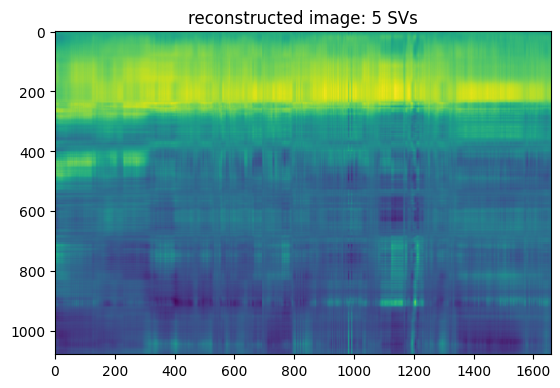

In [217]:
# Let us use the top 5 singular vectors and reconstruct the matrix using matrix
# multiplication as shown above. Let us also visualize the reconstructed image.

nc = 5  # no of components
reconst_img_5 = U[:, :nc] @ np.diag(s[:nc]) @ VT[:nc, :]
plt.imshow(reconst_img_5)
plt.title("reconstructed image: 5 SVs")

Text(0.5, 1.0, 'reconstructed image: 50 SVs')

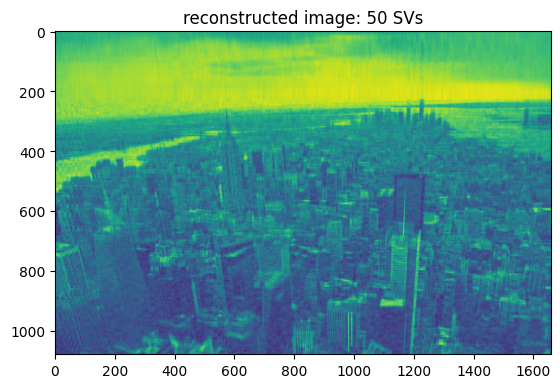

In [218]:
# let's use 50 SVs

nc = 50  # no of components
reconst_img_50 = U[:, :nc] @ np.diag(s[:nc]) @ VT[:nc, :]
plt.imshow(reconst_img_50)
plt.title("reconstructed image: 50 SVs")

Text(0.5, 1.0, 'reconstructed image: 100 SVs')

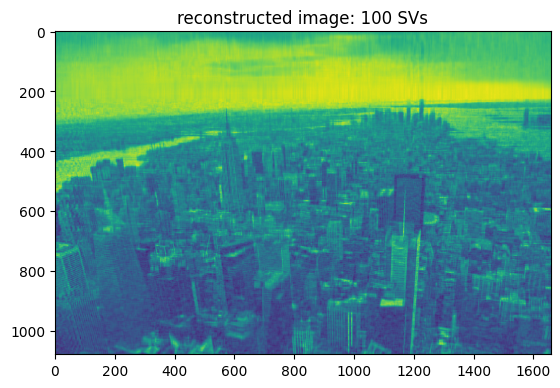

In [219]:
nc = 50  # no of components
reconst_img_100 = U[:, :nc] @ np.diag(s[:nc]) @ VT[:nc, :]
plt.imshow(reconst_img_100)
plt.title("reconstructed image: 100 SVs")


Text(0.5, 1.0, 'reconstructed image: 1000 SVs')

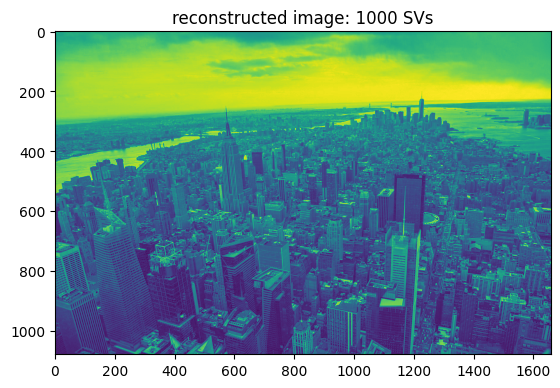

In [220]:
nc = 1000  # no of components
reconst_img_1000 = U[:, :nc] @ np.diag(s[:nc]) @ VT[:nc, :]
plt.imshow(reconst_img_1000)
plt.title("reconstructed image: 1000 SVs")

- The quality of reconstructed image would improve as we use more top singular vectors. Here is a compraison of the reconstructed image using different number of top components.

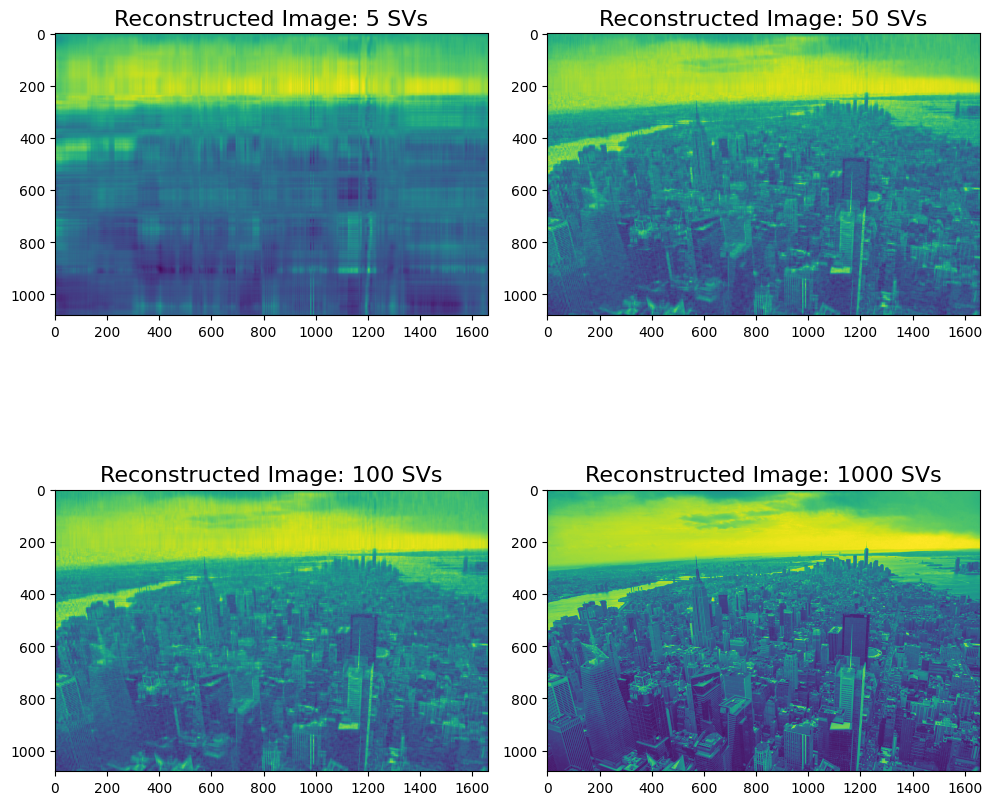

In [221]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0, 0].imshow(reconst_img_5)
axs[0, 0].set_title('Reconstructed Image: 5 SVs', size=16)
axs[0, 1].imshow(reconst_img_50)
axs[0, 1].set_title('Reconstructed Image: 50 SVs', size=16)
axs[1, 0].imshow(reconst_img_100)
axs[1, 0].set_title('Reconstructed Image: 100 SVs', size=16)
axs[1, 1].imshow(reconst_img_1000)
axs[1, 1].set_title('Reconstructed Image: 1000 SVs', size=16)
plt.tight_layout()

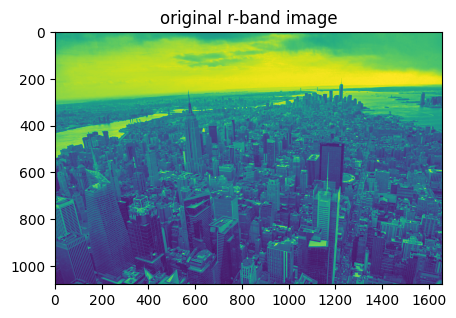

In [222]:
plt.figure(figsize=(5,5))
plt.title("original r-band image")
plt.imshow(img_arr)

# Probability and Statistics

## Normal distribution

In [223]:
from scipy import stats
stats.norm(0, 1)

In [226]:
# pdf and cdf
stats.norm(0, 1).pdf(0), stats.norm(0, 1).cdf(0)

(0.3989422804014327, 0.5)

In [227]:
# gaussian distribution
def norm_(x, mu, sigma):
    d = np.exp(-(x - mu)**2 / (2* sigma**2))
    return d/(2*np.pi*sigma**2)**0.5

norm_(0, 0, 1)

0.3989422804014327

In [230]:
stats.norm(100, 12).pdf(98), stats.norm(100, 12).cdf(98), stats.norm(100, 12).cdf(100)

(0.032786643008494994, 0.43381616738909634, 0.5)


- example: find Pr(X < 8.6) from N(8.0, 5.0)

In [231]:
stats.norm(8, 5).cdf(8.6)

0.5477584260205838

In [232]:
# standardize it
z = (8.6 - 8.0)/5.0
stats.norm(0, 1).cdf(z)

0.5477584260205838

- direct calculation of the pdf

In [233]:
import math
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

print(normpdf(98, 100, 12), stats.norm(100, 12).pdf(98))

0.032786643008494994 0.032786643008494994


## Population and sample
- population, sample
- pouplation mean, population variance
- sample mean, sample variance (biased, unbiased)

In [234]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [235]:
# normal distribution

z = np.random.normal(170, 20, size=1000)    # normal dist with (170, 20)

In [245]:
# uniform distribution

z2 = np.random.uniform(0,100,size=10)
print(z2)

# integers in (1, 99)
z3 = np.arange(1, 100, 10)
z3 = np.random.permutation(z3) # uniform dist (1~ 100)
z3

[86.34359725 29.73633917 35.09618706  4.56418277 18.47230225 97.72307361
 12.23270389 98.7716708  89.11184135 32.05559188]


array([61, 71, 91, 11,  1, 51, 21, 81, 41, 31])

- population mean and variance (모평균과 모분산): usually unknown

In [246]:
z = np.random.normal(170, 20, size=1000)
mu, sigma = np.mean(z), np.std(z)
mu, sigma

(168.38076463825553, 19.97440924663917)

- estimating population mean and variance by sample mean and sample variance (모평균과 모분산의 추정)

In [247]:
z = np.random.normal(170, 20, size=1000)    # normal dist with (170, 20)

n_sample = 5      # sample size
n_iter=1000       # number of sampling iteration

list_mean, list_sig_biased, list_sig_unbiased = [], [], []

for i in range(n_iter):
    sample = np.random.choice(z, n_sample)
    m = sample.mean()
    sig_biased = ((sample - m)**2).sum() / n_sample
    sig_unbiased = ((sample - m)**2).sum() / (n_sample-1)

    list_mean.append(m)
    list_sig_biased.append(np.sqrt(sig_biased))
    list_sig_unbiased.append(np.sqrt(sig_unbiased))


In [248]:
sum(list_mean)/n_iter, sum(list_sig_biased)/n_iter, sum(list_sig_unbiased)/n_iter

(169.4374841849441, 16.836903528613615, 18.824230410293072)

- we can see that unbiased one is closer to the original sigma.

# Sampling distribution (distribution of **Sample means**)
 - normal distribution with:
    - u_x = mu
    - sigma_x = sigma/root(n)

[]

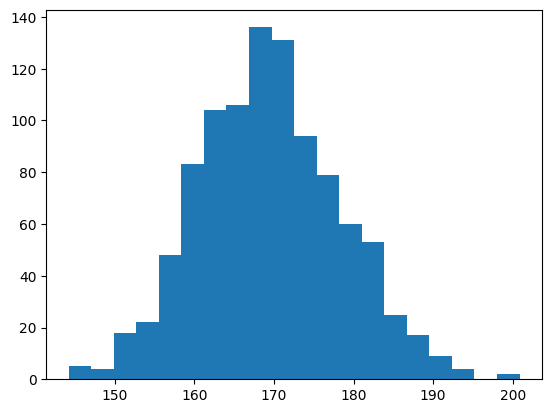

In [250]:
plt.hist(list_mean, bins=20)   # normal
plt.plot()

- estimates population mean and population variance

In [251]:
# estimates population mean and population variance

np.array(list_mean).mean(), np.array(list_mean).std() * np.sqrt(n_sample)

(169.4374841849444, 20.056993174038634)

In [253]:
mu, sigma  # population mean and sigma

(168.38076463825553, 19.97440924663917)

- we see that the sampling distribution of the sample mean can estimate the popuation mean and sigma.

## Central Limit Theorem
- even if the population is not normal, sample means will be approximately normal as long as the sample size is large enough.

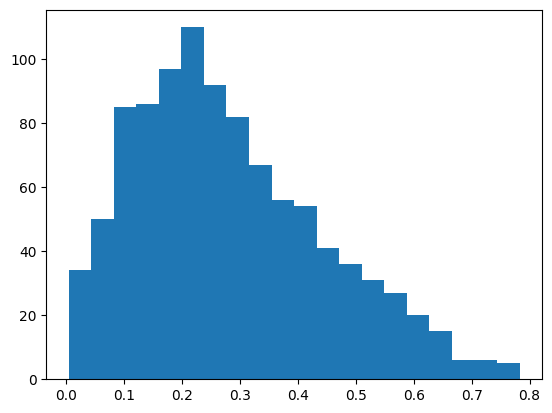

In [254]:
# let's try beta distribution for the population
z = np.random.beta(a=2, b=5, size=1000)
plt.hist(z, bins=20)
plt.show()

In [255]:
z.mean(), z.std()

(0.2813945189619818, 0.16266400386476015)

In [256]:
# now, sampling distribution is
n_sample = 30     # sample size
n_iter=1000      # number of sampling iteration
sample_means=[]
for i in range(n_iter):
    sample = np.random.choice(z, n_sample)
    sample_means.append(sample.mean())

In [257]:
# mean and std (standard error) of sample means
m_, s_ = np.array(sample_means).mean(), np.array(sample_means).std() * np.sqrt(n_sample)
m_, s_

(0.2804363642910072, 0.16251486015892724)

<Figure size 640x480 with 0 Axes>

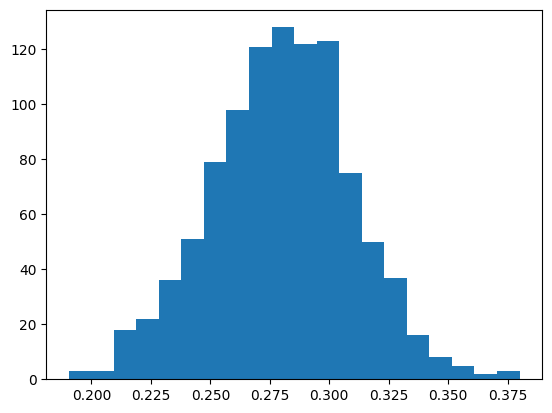

<Figure size 640x480 with 0 Axes>

In [262]:
plt.hist(sample_means, bins=20)
plt.figure()

<Axes: ylabel='Count'>

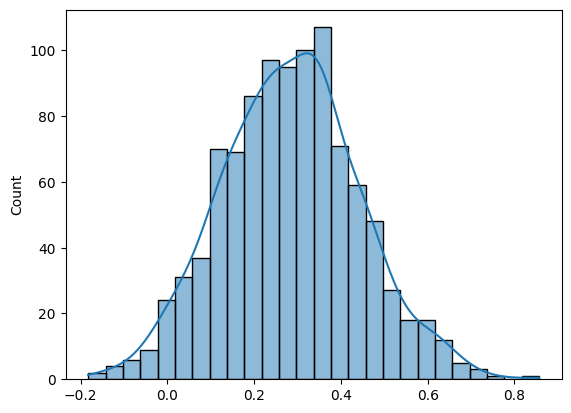

In [263]:
sns.histplot(np.random.normal(m_, s_, size=1000), kde=True)

- looks the similar

## Distribution of sample vriance (Chi-square)
- sampling distribution of sample variance
- (n-1)S^2/sigma^2 ~ Chi2(n-1)

[]

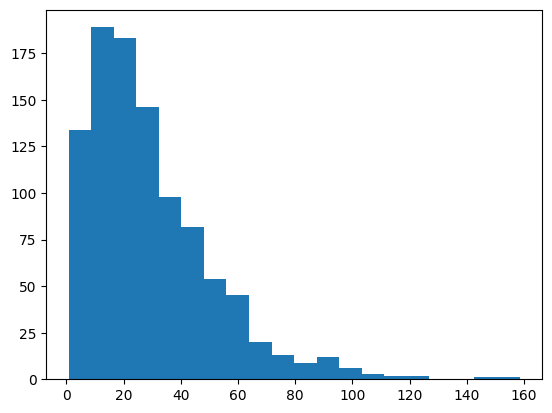

In [265]:
# Chi-square distribution
z = (n_sample -1) * np.array(list_sig_unbiased)**2 / sigma**2
plt.hist(z, bins=20)    # chi2- dist
plt.plot()

In [266]:
loc, scale = 170, 20
X = np.random.normal(loc, scale, size=1000)
n_iter = 1000
n_sample = 5
sample_means, sample_vars = [], []

for i in range(n_iter):
    sample = np.random.choice(X, n_sample)
    sample_mean = sample.mean()
    sample_var = ((sample - sample_mean)**2).sum() / (n_sample-1)  # var of the sample
    sample_means.append(sample_mean)
    sample_vars.append(sample_var)

v = (n_sample -1) * np.array(sample_vars) / scale**2                 # chi-2


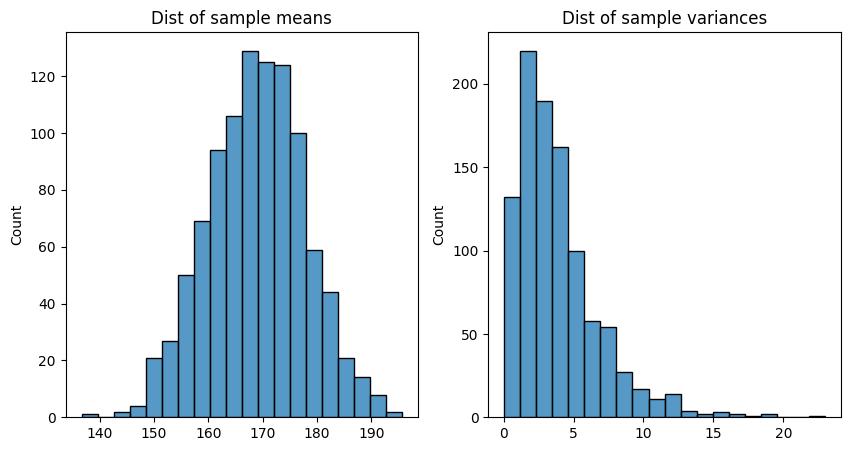

In [267]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(sample_means, bins=20)
plt.title("Dist of sample means")
plt.subplot(1,2,2)
plt.title("Dist of sample variances")
sns.histplot(v, bins=20)
plt.show()

# T-distribution and F-distribution
- T-distribution:
  - similar to normal, but with havier tails (meaning that more values are located in the tail ends)
- F-distribution:

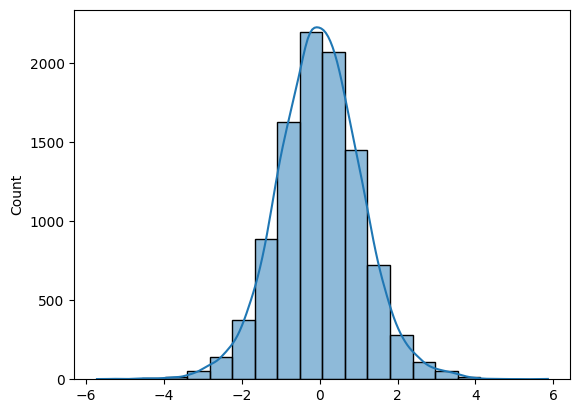

In [270]:
from scipy.stats import t

x = t.rvs(df=12, size=10000) # generate t distribution with sample size 10000
sns.histplot(x, edgecolor='black', bins=20, kde=True)
plt.show()

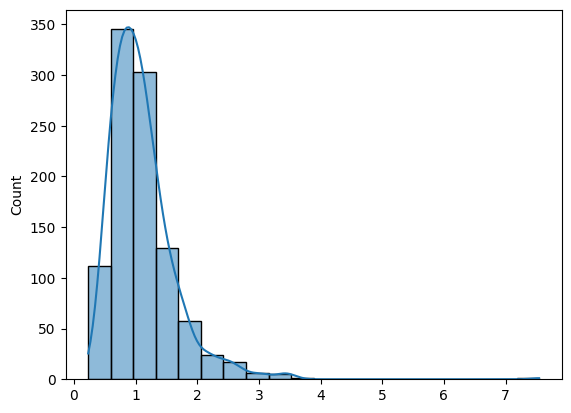

(1.125, 0.2805572660098522, 1.8065676503195025, 7.074636015325671)

In [271]:
from scipy.stats import f

dfn, dfd = 29, 18
r = f.rvs(dfn, dfd, size=1000)
sns.histplot(r, edgecolor='black', bins=20, kde=True)
plt.show()

mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')
mean, var, skew, kurt

## t-value

<Axes: ylabel='Density'>

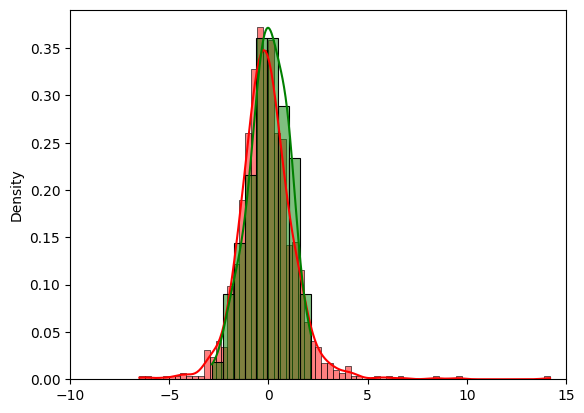

In [272]:
mu, std = 170, 50
z = np.random.normal(mu, std, size=100)
n_sample = 5      # sample size
n_iter=1000       # number of sampling iteration

s_means, s_variances, t_vals = [], [], []
for i in range(n_iter):
    sample = np.random.choice(z, n_sample)

    s_mean = sample.mean()
    s_variance = ((sample - s_mean)**2).sum() / (n_sample-1)
    t_val = (s_mean - mu) / (np.sqrt(s_variance) / np.sqrt(n_sample))

    s_means.append(s_mean)
    s_variances.append(s_variance)
    t_vals.append(t_val)

plt.xlim([-10, 15])
sns.histplot(t_vals, stat='density', kde=True, color='r')                   # t-vals
sns.histplot((z-z.mean())/z.std(), stat='density', kde='True', color='g')   # standard normal (z)

- population variance estimation
  - real population variance
  - pop variance estimated from s_variances  (i.e. amazing theorem)
  - pop variance estimated from sample distribution (x_bar)

In [273]:
# variances
# - real population variance
# - pop variance estimated from s_variances  (i.e. amazing theorem)
# - pop variance estimated from sampledistribution (x_bar)

print("Real std: ", std)
print("Estimated from sample variances: ", np.sqrt(np.array(s_variances).mean()))
print("Estimated from Sampling Distribution: ", np.array(s_means).std() * np.sqrt(n_sample))

Real std:  50
Estimated from sample variances:  46.17786834950292
Estimated from Sampling Distribution:  46.35405642062847


- t-distribution and confidence interval

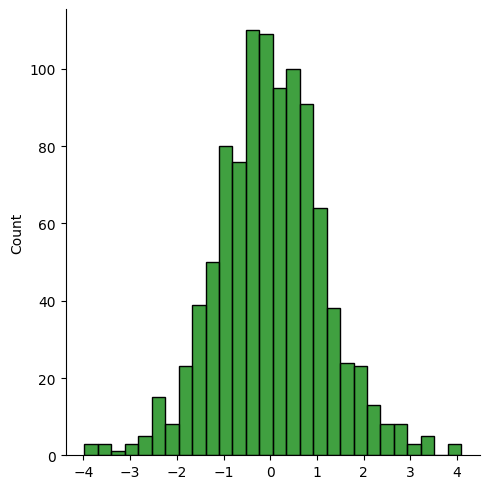

In [275]:
# t-distribution graph
r = t.rvs(df=9, size=1000)
sns.displot(r, color='g')

(-3.24983554401537, 0.0028296547623270574)

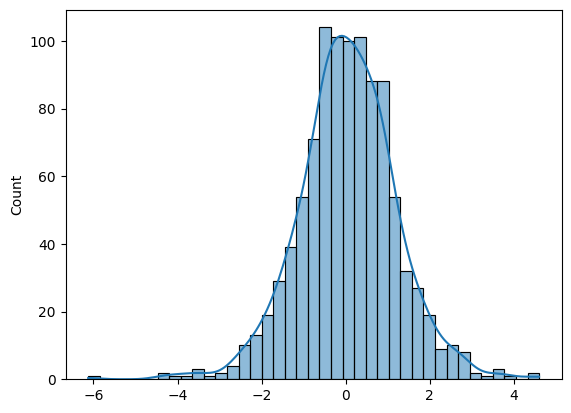

In [276]:
# df=degree of freedom, q=significance level (1 - confidence level)
import scipy
r = t.rvs(df=9, size=1000)
sns.histplot(r, kde=True)

df , q = 10 - 1 , 0.005
t_critical = scipy.stats.t.ppf(q, df)   # Percent point function (inverse of cdf — percentiles)
p_val = scipy.stats.t.cdf(-3.61, df)
t_critical, p_val

# t-test

- one-sample t-test
  - Example : you have some ages and you are checking whether avg age is 30 or not.

In [277]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, t
from scipy import stats
import scipy
import seaborn as sns

<Axes: ylabel='Count'>

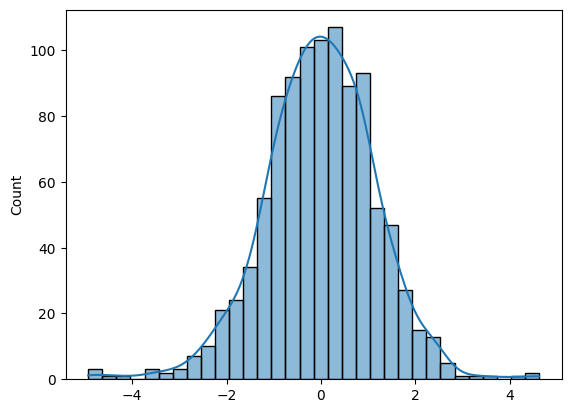

In [278]:
r = t.rvs(df=9, size=1000)
sns.histplot(r, kde=True)

In [280]:
n_sample = 10
ages1 = [26, 25, 21, 36, 20, 26, 22, 22, 30, 30]
ages2 = [56, 34, 59, 34, 73, 35, 16, 10, 10, 10]
print("the sample mean and sample std of ages1: ", np.mean(ages1), np.std(ages1))
print("the sample mean and sample std of ages2: ", np.mean(ages2), np.std(ages2))

# population mean = 30
tset1, pval1 = ttest_1samp(ages1, 30)
print("ages1: t-value is {}, and p-value is {}".format(tset1, pval1))

tset2, pval2 = ttest_1samp(ages2, 30)
print("ages2: t-value is {}, and p-value is {}".format(tset2, pval2))

for pval in [pval1, pval2]:
    if pval < 0.05:    # alpha value is 0.05 or 5%
       print("Rejecting null hypothesis")
    else:
       print("Fail to reject (accept ^^^) null hypothesis")

the sample mean and sample std of ages1:  25.8 4.749736834815167
the sample mean and sample std of ages2:  33.7 21.638160735145675
ages1: t-value is -2.652778551359534, and p-value is 0.026355893588824095
ages2: t-value is 0.5129826021659452, and p-value is 0.6203168064392417
Rejecting null hypothesis
Fail to reject (accept ^^^) null hypothesis


- CI (confidence interval)

In [282]:
ages1 = [26, 25, 21, 36, 20, 26, 22, 22, 30, 30]
lb, ub = stats.t.interval(confidence=0.95, df=len(ages1)-1)
print(lb, ub)

-2.2621571627409915 2.2621571627409915


In [284]:
lb * stats.sem(ages1) + np.array(ages1).mean(), ub * stats.sem(ages1) + np.array(ages1).mean()

(22.218449599329382, 29.38155040067062)

In [327]:
# calculate CI for the true true population mean using a sample of 15 plants
stats.t.interval(confidence=0.95,
                 df=len(ages1)-1,
                 loc=np.mean(ages1),
                 scale=stats.sem(ages1))

(22.218449599329382, 29.38155040067062)

- two-sample independent t-test
  - Example : Compare the effectiveness of ammonium chloride and urea, on the grain yield of paddy. (벼의 곡물 수확량에 대한 염화암모늄과 요소의 효과를 비교)

<Axes: ylabel='Count'>

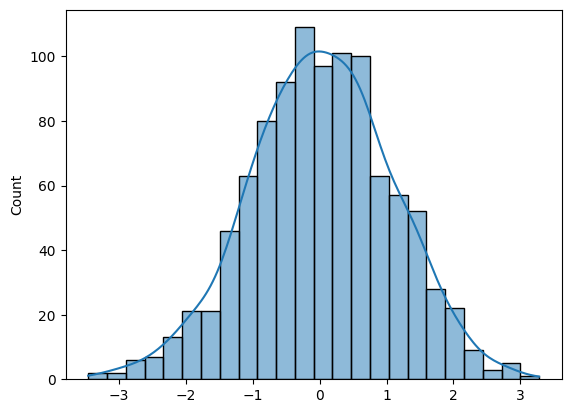

In [328]:
r = t.rvs(df=26, size=1000)
sns.histplot(r, kde=True)

In [329]:
Ammonium_chloride=[13.4,10.9,11.2,11.8,14,15.3,14.2,12.6,17,16.2,16.5,15.7]
Urea=[12,11.7,10.7,11.2,14.8,14.4,13.9,13.7,16.9,16,15.6,16]
n1, n2 = len(Ammonium_chloride), len(Urea)
x1_m, x2_m = np.mean(Ammonium_chloride), np.mean(Urea)
x1_std, x2_std = np.std(Ammonium_chloride), np.std(Urea)
print("number of samples: ", n1, n2)
print("means of two samples: ", x1_m, x2_m)
print("std of two samples: ", x1_std, x2_std)

tval = (x1_m - x2_m) / np.sqrt(x1_std**2/n1 + x2_std**2/n2)   # approx.
pval = scipy.stats.t.cdf(tval, n1+n2-2)
tval, (1-pval)*2

number of samples:  12 12
means of two samples:  14.066666666666665 13.908333333333333
std of two samples:  2.026217055390551 1.9956028050580497


(0.19286027404090295, 0.8488377215788003)

In [330]:
t_value, p_value = ttest_ind(Ammonium_chloride, Urea)
t_value, p_value

(0.1846496543760765, 0.8551954147800473)

In [331]:
print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05

if p_value <= alpha:
    print('Conclusion: Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,
          '''We reject the null hypothesis H0. So we conclude that the
          effect of ammonium chloride and urea on grain yield of paddy are not
          equal i.e., μ1 != μ2 at %.2f level of significance.'''%alpha)

Test statistic is 0.184650
p-value for two tailed test is 0.855195


- paired t-test
  - example: Eleven schoolboys were given a test in Statistics. They were given a Month’s tuition and a second test were held at the end of it. Do the marks give evidence that the students have benefited from the exam coaching?
  - H0: The students have not benefited from the tuition class. i.e., d = 0
  - H1: The students have benefited from the tuition class. i.e., d < 0

In [332]:
alpha = 0.05
first_test =[23, 20, 19, 21, 18, 20, 18, 17, 23, 16, 19]
second_test=[24, 19, 22, 18, 20, 22, 20, 20, 23, 20, 18]
third_test = [34, 29, 32, 28, 30, 22, 40, 30, 23, 20, 28]

In [333]:
t_value,p_value = ttest_rel(first_test,second_test)
t_value,p_value

(-1.7073311796734163, 0.11856467647601138)

- A paired t-test (stats.ttest_rel) is the same as an independent samples t-test on the difference scores for each group.

In [334]:
# for 1-sample test
differences = [second_test[i] - first_test[i] for i in range(len(first_test))]
ttest_1samp(differences, popmean=0)

TtestResult(statistic=1.7073311796734163, pvalue=0.11856467647601138, df=10)

In [335]:
def print_comment(pval, alpha):
    if pval <= alpha:
        print('Conclusion: Since p-value(=%f)'%one_tailed_p_value,'<','alpha(=%.2f)'%alpha,
          '''Reject H0. --> So we conclude that the students have benefited
          by the tuition class. i.e., d = 0 at %.2f level of significance.'''%alpha)
    else:
        print('Conclusion: Since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f)'%alpha,
          '''Do not reject H0. --> So we conclude that the students have not
          benefited by the tuition class. i.e., d = 0 at %.2f level of significance.'''%alpha)

In [336]:
one_tailed_p_value = p_value/2

print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for one_tailed_test is %f'%one_tailed_p_value)
print_comment(one_tailed_p_value, 0.05)

Test statistic is -1.707331
p-value for one_tailed_test is 0.059282
Conclusion: Since p-value(=0.059282) > alpha(=0.05) Do not reject H0. --> So we conclude that the students have not
          benefited by the tuition class. i.e., d = 0 at 0.05 level of significance.


In [337]:
# one more example for the lecture slide
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel

a = np.array([3,3,3,12,15,16,17,19,23,24,32])
b = np.array([20,13,13,20,29,32,23,20,25,15,30])
tvalue, pvalue = ttest_rel(a,b)
print(tvalue, pvalue)
print_comment(pvalue, 0.05)

-2.737328922288368 0.02092847795148222
Conclusion: Since p-value(=0.059282) < alpha(=0.05) Reject H0. --> So we conclude that the students have benefited
          by the tuition class. i.e., d = 0 at 0.05 level of significance.


# ANOVA (one-way ANOVA)
- groups are from one categorical variable
- example:
  - A new medication was developed to increase the libido of those who take the medication.
  - The purpose of this study was to test for a difference between the dosage levels.

In [338]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/difficile.csv")
df

person  dose  libido
0        1     1       3
1        2     1       2
2        3     1       1
3        4     1       1
4        5     1       4
5        6     2       5
6        7     2       2
7        8     2       4
8        9     2       2
9       10     2       3
10      11     3       7
11      12     3       4
12      13     3       5
13      14     3       3
14      15     3       6

In [339]:
df['dose'].value_counts()

dose
1    5
2    5
3    5
Name: count, dtype: int64

In [340]:
df.drop('person', axis= 1, inplace= True)
# Recoding value from numeric to string
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)

In [341]:
df

dose  libido
0   placebo       3
1   placebo       2
2   placebo       1
3   placebo       1
4   placebo       4
5       low       5
6       low       2
7       low       4
8       low       2
9       low       3
10     high       7
11     high       4
12     high       5
13     high       3
14     high       6

In [342]:
group1 = df['libido'][df['dose'] == 'high']
group2 = df['libido'][df['dose'] == 'low']
group3 = df['libido'][df['dose'] == 'placebo']

In [343]:
import scipy.stats as stats
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

In [344]:
!pip install researchpy

In [345]:
# ANOVA table
import researchpy as rp

rp.summary_cont(df['libido'])

Variable     N    Mean      SD      SE  95% Conf.  Interval
0   libido  15.0  3.4667  1.7674  0.4563     2.4879    4.4454

In [346]:
rp.summary_cont(df['libido'].groupby(df['dose']))

N  Mean      SD      SE  95% Conf.  Interval
dose                                                 
high     5   5.0  1.5811  0.7071     3.0368    6.9632
low      5   3.2  1.3038  0.5831     1.5811    4.8189
placebo  5   2.2  1.3038  0.5831     0.5811    3.8189

- The overall average libido was 3.5 95% CI(2.5, 4.4) with group averages of 2.2 95% CI(0.9, 3.5) for the placebo group; 3.2 95% CI(1.9, 4.5) for the low dose group; and 5.0 95% CI(3.5, 6.5) for the high dose group. There is a statistically significant difference between the groups and their effects the libido, F= 5.12, p-value= 0.0247.

# Chi square (Chi2) test

- observed value (input feature) 가 expected value (expected output)와 얼마나 관련이 있는지 결정
- problem of feature selection.

- In the case of classification problems where input variables are also categorical, we can use statistical tests to determine whether the output variable is dependent or independent of the input variables. If independent, then the input variable is a candidate for a feature that may be irrelevant to the problem and removed from the dataset.
https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
- X^2 = sum[(Oi - Ei)^2 / Ei], where
  - Oi: observed frq in each category
  - Ei: expected freq
  - k: number of categories
  - sum[(관측값 - 기댓값)^2 / 기댓값]
- When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value.
- So high Chi-Square value indicates that the hypothesis of independence is incorrect.
- **In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.**

- for the following example (especially for derivation of the expected frequency E), see https://towardsdatascience.com/chi-square-test-with-python-d8ba98117626

### stats.chisquare() and stats.chi2_contingency()
- chisquare(): Calculate a one-way chi-square test.
  - used when you have a distribution in mind and you want test whether a group matches that distribution.
- chi2_contingency(): Chi-square test of independence of variables in a contingency table.
  - used when you don't know the underlying distribution but you want to test whether two (or more) groups have the same distribution.

- chisquare()

In [347]:
# example
stats.chisquare([16, 18, 16, 14, 12, 16]) # default expected frequencies are uniform

Power_divergenceResult(statistic=1.3913043478260867, pvalue=0.9252621153358449)

In [348]:
stats.chisquare([16, 18, 16, 14, 12, 16, 0])

Power_divergenceResult(statistic=16.956521739130434, pvalue=0.009444368561071219)

In [349]:
stats.chisquare([16, 18, 16, 14, 12, 12], f_exp=[16, 16, 16, 16, 16, 8])

Power_divergenceResult(statistic=3.5, pvalue=0.6233876277495822)

In [350]:
# manual calculation
obs = np.array([16, 18, 16, 14, 12, 12])
exp = np.array([16, 16, 16, 16, 16, 8])
np.sum((obs - exp)**2 / exp)    # chi2 value

3.5

In [351]:
# if 2-D array, by default the test is applied to each column
obs = np.array([[16, 18, 16, 14, 12, 12, 17],
                [32, 24, 16, 28, 20, 24, 10]]).T
print(stats.chisquare(obs))

Power_divergenceResult(statistic=array([ 2.26666667, 14.90909091]), pvalue=array([0.89361307, 0.02097569]))


In [352]:
# example: toss a coin 1100 times and get 553 heads.
_, pvalue = stats.chisquare([553, 547], f_exp=[1100*0.5, 1100*0.5])
print(pvalue)

0.8564407259982999


- chi2_contingency()

In [353]:
# chi2_contingency returns (chi2, p-value, dof, expected)

cont_tab = np.array([[10, 10, 20],
                     [20, 20, 20]])
stats.chi2_contingency(cont_tab)

Chi2ContingencyResult(statistic=2.7777777777777777, pvalue=0.24935220877729622, dof=2, expected_freq=array([[12., 12., 16.],
       [18., 18., 24.]]))

In [354]:
cont_tab = [[203, 150, 190, 305],
            [195, 170, 250, 400],
            [200, 235, 271, 280]]
stats.chi2_contingency(cont_tab)

Chi2ContingencyResult(statistic=43.1509283858475, pvalue=1.0889041270746032e-07, dof=6, expected_freq=array([[177.99368199, 165.19480519, 211.62793963, 293.18357318],
       [213.04668305, 197.72727273, 253.3046683 , 350.92137592],
       [206.95963496, 192.07792208, 246.06739207, 340.8950509 ]]))

In [355]:
# manual calculation
arr = np.array(cont_tab)
c = arr.sum(axis=0)
r = arr.sum(axis=1)
total = r.sum()
e = np.zeros((arr.shape[0], arr.shape[1]))

for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        e[i][j] = r[i]*c[j]/total
print (e)   # expected value: same as the result of chi2_contingency()

[[177.99368199 165.19480519 211.62793963 293.18357318]
 [213.04668305 197.72727273 253.3046683  350.92137592]
 [206.95963496 192.07792208 246.06739207 340.8950509 ]]


## one practical example:
- to see whether two features are significantly different

In [356]:
import pandas as pd
import scipy.stats as stats

# create sample data according to survey
data = [['18-29', 'Conservative'] for i in range(141)] + \
        [['18-29', 'Socialist'] for i in range(68)] + \
        [['18-29', 'Other'] for i in range(4)] + \
        [['30-44', 'Conservative'] for i in range(179)] + \
        [['30-44', 'Socialist'] for i in range(159)] + \
        [['30-44', 'Other'] for i in range(7)] + \
        [['45-65', 'Conservative'] for i in range(220)] + \
        [['45-65', 'Socialist'] for i in range(216)] + \
        [['45-65', 'Other'] for i in range(4)] + \
        [['65 & older', 'Conservative'] for i in range(86)] + \
        [['65 & older', 'Socialist'] for i in range(101)] + \
        [['65 & older', 'Other'] for i in range(4)]
df = pd.DataFrame(data, columns = ['Age Group', 'Political Affiliation'])
print(df.shape)

(1189, 2)


In [357]:
df.sample(frac=.1).head()  # 데이터 랜덤하게 일부만

Age Group Political Affiliation
1021  65 & older          Conservative
851        45-65             Socialist
897        45-65             Socialist
98         18-29          Conservative
187        18-29             Socialist

- contingency table: display format used to analyse and record the relationship between two or more categorical variables.

In [358]:
# create contingency table
data_crosstab = pd.crosstab(df['Age Group'],
                            df['Political Affiliation'],
                            margins=True, margins_name="Total")
data_crosstab

Political Affiliation  Conservative  Other  Socialist  Total
Age Group                                                   
18-29                           141      4         68    213
30-44                           179      7        159    345
45-65                           220      4        216    440
65 & older                       86      4        101    191
Total                           626     19        544   1189

In [359]:
# significance level
alpha = 0.05
dof = 6   # (3-1) * (4-1)

# Calcualtion of Chisquare test statistics
chi_square = 0
rows = df['Age Group'].unique()
columns = df['Political Affiliation'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

pvalue = 1 - stats.chi2.cdf(chi_square, dof)
print("Chi2-score is: {}, and p-value is: {}".format(chi_square, pvalue))

Chi2-score is: 24.367421717305202, and p-value is: 0.0004469083391495099


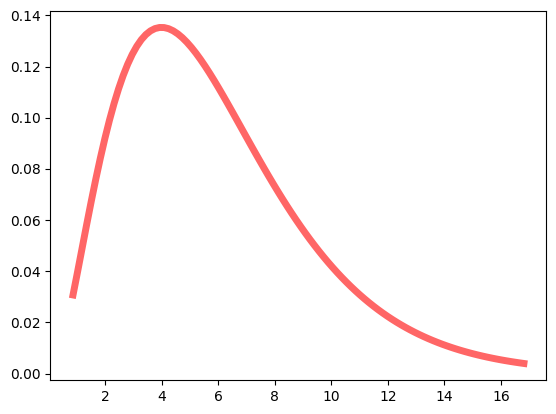

In [360]:
dof = 6   # (3-1) * (4-1)
x = np.linspace(chi2.ppf(0.01, dof),
                chi2.ppf(0.99, dof), 100)
plt.plot(x, chi2.pdf(x, dof),
       'r-', lw=5, alpha=0.6, label='chi2 pdf')

In [361]:
chi2(df=6).ppf(.95)

12.591587243743977

- chi_square = 24.36 >> 12.59 -> so, reject H0
  - two features are significantly different.

In [362]:
# let's use the function chi2_contingency() - the same result
data_crosstab = pd.crosstab(df['Age Group'],
                            df['Political Affiliation'])
data_crosstab

Political Affiliation  Conservative  Other  Socialist
Age Group                                            
18-29                           141      4         68
30-44                           179      7        159
45-65                           220      4        216
65 & older                       86      4        101

In [363]:
tab = data_crosstab.values
stats.chi2_contingency(tab)

Chi2ContingencyResult(statistic=24.367421717305206, pvalue=0.00044690833914947634, dof=6, expected_freq=array([[112.14297729,   3.40370059,  97.45332212],
       [181.64003364,   5.51303616, 157.84693019],
       [231.6568545 ,   7.03111859, 201.31202691],
       [100.56013457,   3.05214466,  87.38772077]]))

# Z-test Example:
- Suppose the IQ in a certain population is normally distributed with a mean of μ = 100 and standard deviation of σ = 15.
- A researcher wants to know if a new drug affects IQ levels, so he recruits 20 patients to try it and records their IQ levels.

In [364]:
from statsmodels.stats.weightstats import ztest
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#enter IQ levels for 20 patients
data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99,
        105, 109, 109, 109, 110, 112, 112, 113, 114, 115]

#perform one sample z-test
zvalue, pvalue = ztest(data, value=100)   # value = known mean
zvalue, pvalue

(1.5976240527147705, 0.1101266701438426)

- conclusion: Since this p-value is not less than .05, we do not have sufficient evidence to reject the null hypothesis. In other words, the new drug does not significantly affect IQ level.

In [365]:
# calculation by hand
data = np.array(data)
n = len(data)
xbar = data.mean()
var = np.sum((data - xbar)**2).sum() / (n-1)
std = np.sqrt(var)

sigma_est = std / np.sqrt(n)   # estimated population std
zval = (xbar - 100) / sigma_est
pval = (1 - stats.norm(0, 1).cdf(zval)) * 2
zval, pval

(1.5976240527147705, 0.11012667014384259)

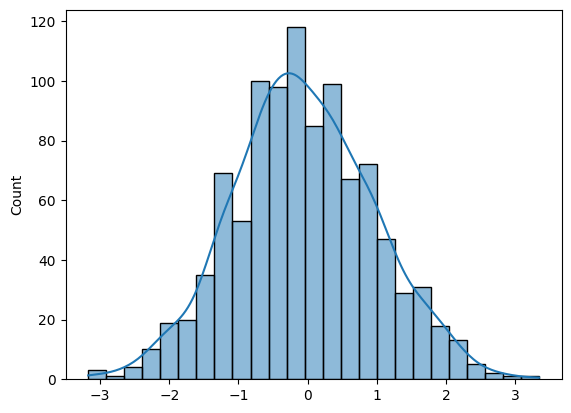

In [366]:
x = np.random.normal(size=1000)
sns.histplot(x, kde=True)
plt.show()

In [367]:
stats.ttest_1samp(data, 100)    # can see the similar result (the same statistic)

TtestResult(statistic=1.5976240527147707, pvalue=0.12662462536124375, df=19)

In [369]:
# confidence interval for the true population mean
stats.norm.interval(confidence=0.95, loc=np.mean(data), scale=stats.sem(data))

(99.30826229725999, 106.79173770274001)

In [371]:
# confidence interval for standard normal
stats.norm.interval(confidence=0.95)

(-1.959963984540054, 1.959963984540054)

- two sample z-test
  - Suppose the IQ levels among individuals in two different cities are known to be normally distributed with known standard deviations.
  - A researcher wants to know if the mean IQ level between individuals in city A and city B are different, so she selects a simple random sample of  20 individuals from each city and records their IQ levels.

In [372]:
#enter IQ levels for 20 individuals from each city
cityA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99,
         105, 109, 109, 109, 110, 112, 112, 113, 114, 114]

cityB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109,
         109, 114, 115, 116, 117, 117, 128, 129, 130, 133]

#perform two sample z-test
ztest(cityA, cityB, value=0)

(-1.9953236073282115, 0.046007596761332065)

- conclusion: Since this p-value is less than .05, we have sufficient evidence to reject the null hypothesis. In other words, the mean IQ level is significantly different between the two cities.

# Exercise

pd.crosstab()

In [374]:
# for exercise
import pandas as pd
data = pd.DataFrame({'id': ['id1', 'id1', 'id1', 'id2', 'id2', 'id3'],
                  'fac_1': ['a', 'a', 'a', 'b', 'b', 'b'],
                  'fac_2': ['d', 'd', 'd', 'c', 'c', 'd']})
data

id fac_1 fac_2
0  id1     a     d
1  id1     a     d
2  id1     a     d
3  id2     b     c
4  id2     b     c
5  id3     b     d

In [375]:
pd.crosstab(data.fac_1, data.fac_2)

fac_2  c  d
fac_1      
a      0  3
b      2  1

In [376]:
pd.crosstab(data.id, data.fac_1)

fac_1  a  b
id         
id1    3  0
id2    0  2
id3    0  1

In [381]:
from collections import defaultdict  # provides a default value for a nonexistent key
x = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0])

In [384]:
x.items(), x.keys(), x.values(), x

(dict_items([]),
 dict_keys([]),
 dict_values([]),
 defaultdict(<function __main__.<lambda>()>, {}))

In [385]:
x['a'] = 'hello'

In [386]:
x.items(), x.keys(), x.values(), x

(dict_items([('a', 'hello')]),
 dict_keys(['a']),
 dict_values(['hello']),
 defaultdict(<function __main__.<lambda>()>, {'a': 'hello'}))

In [392]:
x_dict = {}   # regular dict
x_dict.items()

dict_items([])

In [399]:
from collections import defaultdict

# Example string
string = "default"

# Counting characters using defaultdict
char_count = defaultdict(int)
for char in string:
    char_count[char] += 1   # if None, the default (int) is 0

print(char_count)

defaultdict(<class 'int'>, {'d': 1, 'e': 1, 'f': 1, 'a': 1, 'u': 1, 'l': 1, 't': 1})


In [400]:
# Example string
string = "default"

# Counting characters using dict
char_count = {}
for char in string:
    if char in char_count:
        char_count[char] += 1
    else:
        char_count[char] = 1

print(char_count)

{'d': 1, 'e': 1, 'f': 1, 'a': 1, 'u': 1, 'l': 1, 't': 1}
